In [164]:
import findspark
findspark.init()
from pyspark import SparkContext
sc=SparkContext()
sc

<SparkContext master=yarn appName=pyspark-shell>

In [165]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.getOrCreate()
spark

## Load Data (1950 to 1990 Every 5 Years)

In [166]:
data1950 = spark.read.option("header", "false").csv("s3://noaa-global-hourly-pds/1950/*.csv")

In [167]:
data1955 = spark.read.option("header", "false").csv("s3://noaa-global-hourly-pds/1955/*.csv")

In [168]:
data1960 = spark.read.option("header", "false").csv("s3://noaa-global-hourly-pds/1960/*.csv")

In [169]:
data1965 = spark.read.option("header", "false").csv("s3://noaa-global-hourly-pds/1965/*.csv")

In [170]:
data1970 = spark.read.option("header", "false").csv("s3://noaa-global-hourly-pds/1970/*.csv")

In [171]:
data1975 = spark.read.option("header", "false").csv("s3://noaa-global-hourly-pds/1975/*.csv")

In [172]:
data1980 = spark.read.option("header", "false").csv("s3://noaa-global-hourly-pds/1980/*.csv")

In [173]:
data1985 = spark.read.option("header", "false").csv("s3://noaa-global-hourly-pds/1985/*.csv")

In [174]:
data1990 = spark.read.option("header", "false").csv("s3://noaa-global-hourly-pds/1990/*.csv")

In [175]:
data1950.cache()
data1955.cache()
data1960.cache()
data1965.cache()
data1970.cache()
data1975.cache()
data1980.cache()
data1985.cache()
data1990.cache()

DataFrame[_c0: string, _c1: string, _c2: string, _c3: string, _c4: string, _c5: string, _c6: string, _c7: string, _c8: string, _c9: string, _c10: string, _c11: string, _c12: string, _c13: string, _c14: string, _c15: string, _c16: string, _c17: string, _c18: string, _c19: string, _c20: string, _c21: string, _c22: string, _c23: string, _c24: string, _c25: string, _c26: string, _c27: string, _c28: string, _c29: string, _c30: string, _c31: string, _c32: string, _c33: string, _c34: string, _c35: string, _c36: string, _c37: string, _c38: string, _c39: string, _c40: string, _c41: string, _c42: string, _c43: string, _c44: string, _c45: string, _c46: string]

In [176]:
data1950.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- _c16: string (nullable = true)
 |-- _c17: string (nullable = true)
 |-- _c18: string (nullable = true)
 |-- _c19: string (nullable = true)
 |-- _c20: string (nullable = true)
 |-- _c21: string (nullable = true)
 |-- _c22: string (nullable = true)
 |-- _c23: string (nullable = true)
 |-- _c24: string (nullable = true)
 |-- _c25: string (nullable = true)
 |-- _c26: string (nullable = true)
 |-- _c27: string (nullable = tru

In [177]:
data1950.show(3)

+-----------+-------------------+------+---------+---------+---------+-------------+-----------+---------+---------------+--------------+-----------+------------+-------+-------+-------+----+--------+----+----+----+--------------------+----+----+----+----------------+----+----+----------------+
|        _c0|                _c1|   _c2|      _c3|      _c4|      _c5|          _c6|        _c7|      _c8|            _c9|          _c10|       _c11|        _c12|   _c13|   _c14|   _c15|_c16|    _c17|_c18|_c19|_c20|                _c21|_c22|_c23|_c24|            _c25|_c26|_c27|            _c28|
+-----------+-------------------+------+---------+---------+---------+-------------+-----------+---------+---------------+--------------+-----------+------------+-------+-------+-------+----+--------+----+----+----+--------------------+----+----+----+----------------+----+----+----------------+
|    STATION|               DATE|SOURCE| LATITUDE|LONGITUDE|ELEVATION|         NAME|REPORT_TYPE|CALL_SIGN|QUALIT

In [178]:
from pyspark.sql import SparkSession
#from pyspark.sql import functions._
#import pyspark.spark.sql.{SQLContext, Row, DataFrame, Column}
from pyspark.sql import Row,DataFrame,Column
from pyspark.sql import SQLContext
#from pyspark.ml import feature.VectorAssembler

### Create three empty dataframes to store stats of Temperature(Celsius), Visibility(Meters), and Liquid Precipitation(millimeters per hour) for each year from 1950 to 1990 (every five years)

In [179]:
tmp = spark.createDataFrame(
    [
        (0, 0, 0)
    ],
    ['mean', 'std', 'year'] 
)
tmp.show()

+----+---+----+
|mean|std|year|
+----+---+----+
|   0|  0|   0|
+----+---+----+



In [180]:
vis = spark.createDataFrame(
    [
        (0, 0, 0)
    ],
    ['mean', 'std', 'year'] 
)
vis.show()

+----+---+----+
|mean|std|year|
+----+---+----+
|   0|  0|   0|
+----+---+----+



In [181]:
liquid = spark.createDataFrame(
    [
        (0, 0, 0), 
    ],
    ['mean', 'std', 'year'] 
)
liquid.show()

+----+---+----+
|mean|std|year|
+----+---+----+
|   0|  0|   0|
+----+---+----+



## Data Cleaning and EDA

The datasets are too large to run, thus seperate 1950-1990 data to two groups. 


Group1: 1950 - 1975 Every 5 years


Group2: 1980, 1985, 1990


In [182]:
datasets1 = [data1945, data1950, data1955, data1960,data1965, data1970, data1975]
columns = ['mean', 'std', 'year']
year = 1950
for data in datasets1:
    #data cleaning
    data1 = data.where('_c0!= "STATION" ')
    #select useful columns
    data2 = data1.select(col("_c0"), col("_c12"), col("_c13"), col("_c16"))
    data2 = data2.select(col("_c0").alias("station"), 
                             f.split(data2['_c12'], ',')[0].alias("vis"),
                             f.split(data2['_c13'], ',')[0].alias("temp"), 
                             f.split(data2['_c16'], ',')[1].alias("liquid"),
                             f.split(data2['_c16'], ',')[0].alias("liqhr")
                            )
    #convert data type
    data3=data2.withColumn("temp", data2["temp"].cast("float"))
    data3=data3.withColumn("vis", data3["vis"].cast("float"))
    data3=data3.withColumn("liquid", data3["liquid"].cast("float"))
    data3=data3.withColumn("liqhr", data3["liqhr"].cast("float"))
    # Drop rows with NA or missing values in pyspark
    data3=data3.dropna()
    # drop 9999 as NA
    data3 = data3.filter(data3.temp != '9999')
    data3 = data3.filter(data3.vis != '999999')
    data3 = data3.filter(data3.liquid != '9999')
    data3 = data3.filter(data3.liqhr != '99')
    data4=data3.withColumn("temp", data3["temp"]/10)
    #liquid depth per hour
    data4=data4.withColumn("liquid", data4["liquid"]/10/data4["liqhr"])
    #calculate mean and std for each year
    mtemp = data4.agg({"temp": "avg"}).collect()[0]["avg(temp)"] 
    mvis = data4.agg({"vis": "avg"}).collect()[0]["avg(vis)"] 
    mliq = data4.agg({"liquid": "avg"}).collect()[0]["avg(liquid)"] 
    stemp = data4.agg({"temp": "std"}).collect()[0]["stddev(temp)"] 
    svis = data4.agg({"vis": "std"}).collect()[0]["stddev(vis)"] 
    sliq = data4.agg({"liquid": "std"}).collect()[0]["stddev(liquid)"] 
    
    newRow_temp = spark.createDataFrame([(mtemp,stemp,year)], columns)
    newRow_vis = spark.createDataFrame([(mvis,svis,year)], columns)
    newRow_liq = spark.createDataFrame([(mliq,sliq,year)], columns)
    tmp = tmp.union(newRow_temp)
    vis = vis.union(newRow_vis)
    liquid = liquid.union(newRow_liq)
    
    year = year + 5   

Repeat same cleaning steps and compute stats for group2

In [184]:
dateset2 = [data1980, data1985, data1990]
columns = ['mean', 'std', 'year']
year = 1980
for data in dateset2:
    #data cleaning
    data1 = data.where('_c0!= "STATION" ')
    #select useful columns
    data2 = data1.select(col("_c0"), col("_c12"), col("_c13"), col("_c16"))
    data2 = data2.select(col("_c0").alias("station"), 
                             f.split(data2['_c12'], ',')[0].alias("vis"),
                             f.split(data2['_c13'], ',')[0].alias("temp"), 
                             f.split(data2['_c16'], ',')[1].alias("liquid"),
                             f.split(data2['_c16'], ',')[0].alias("liqhr")
                            )
    #convert data type
    data3=data2.withColumn("temp", data2["temp"].cast("float"))
    data3=data3.withColumn("vis", data3["vis"].cast("float"))
    data3=data3.withColumn("liquid", data3["liquid"].cast("float"))
    data3=data3.withColumn("liqhr", data3["liqhr"].cast("float"))
    # Drop rows with NA or missing values in pyspark
    data3=data3.dropna()
    # drop 9999 as NA
    data3 = data3.filter(data3.temp != '9999')
    data3 = data3.filter(data3.vis != '999999')
    data3 = data3.filter(data3.liquid != '9999')
    data3 = data3.filter(data3.liqhr != '99')
    data4=data3.withColumn("temp", data3["temp"]/10)
    #liquid depth per hour
    data4=data4.withColumn("liquid", data4["liquid"]/10/data4["liqhr"])
    #calculate mean and std for each year
    mtemp = data4.agg({"temp": "avg"}).collect()[0]["avg(temp)"] 
    mvis = data4.agg({"vis": "avg"}).collect()[0]["avg(vis)"] 
    mliq = data4.agg({"liquid": "avg"}).collect()[0]["avg(liquid)"] 
    stemp = data4.agg({"temp": "std"}).collect()[0]["stddev(temp)"] 
    svis = data4.agg({"vis": "std"}).collect()[0]["stddev(vis)"] 
    sliq = data4.agg({"liquid": "std"}).collect()[0]["stddev(liquid)"] 
    
    newRow_temp2 = spark.createDataFrame([(mtemp,stemp,year)], columns)
    newRow_vis2 = spark.createDataFrame([(mvis,svis,year)], columns)
    newRow_liq2 = spark.createDataFrame([(mliq,sliq,year)], columns)
    tmp = tmp.union(newRow_temp2)
    vis = vis.union(newRow_vis2)
    liquid = liquid.union(newRow_liq2)
    
    year = year + 5 

### Average Air Temperature(Celsius) and its Standard Deviation Each Year From 1950 to 1990

In [ ]:
tmp = tmp.where("mean!=0.0")

In [186]:
tmp.createOrReplaceTempView('tmp')

In [187]:
tmp = tmp.toPandas()

In [210]:
tmp

,mean,std,year
0,12.175354,12.091771,1950
1,11.897549,12.472409,1955
2,11.813745,13.090213,1960
3,10.485303,13.620959,1965
4,11.582967,14.208523,1970
5,12.151064,11.446605,1975
6,13.124972,12.005562,1980
7,12.336547,13.476317,1985
8,13.461916,12.426196,1990


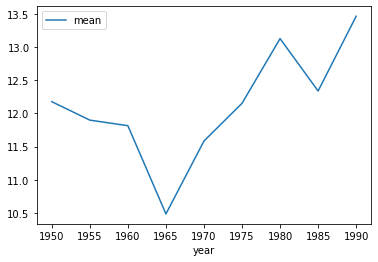

In [211]:
#Average Air Temperature(Celsius)
import matplotlib.pyplot as plt
tmp.plot(kind='line',x='year',y='mean')
plt.show()

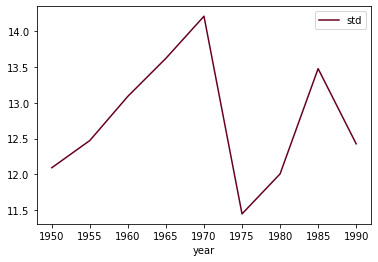

In [212]:
#std of Air Temperature(Celsius)
tmp.plot(kind='line',x='year',y='std', colormap='RdBu')
plt.show()

### Average Visibility Distance(Meters) and its Standard Deviation Each Year From 1950 to 1990

In [ ]:
vis = vis.where("mean!=0.0")

In [193]:
vis.createOrReplaceTempView('vis')
vis = vis.toPandas()

In [218]:
vis

,mean,std,year
0,25562.916718,21595.883647,1950
1,23505.801621,20220.302506,1955
2,24337.143253,20161.826238,1960
3,22357.344760,19069.154199,1965
4,19405.866973,18565.735526,1970
5,21725.970625,20127.808332,1975
6,21113.253961,17889.190464,1980
7,20569.566830,17316.039132,1985
8,19411.633217,16168.436186,1990


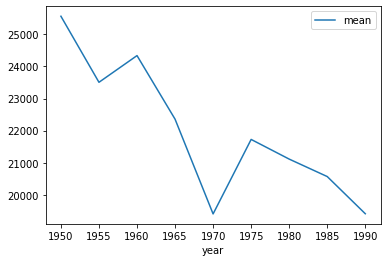

In [219]:
#Average Visibility Distance
vis.plot(kind='line',x='year',y='mean')
plt.show()

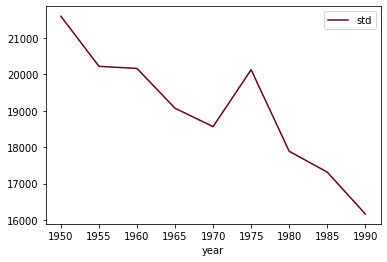

In [220]:
#std of Visibility Distance
vis.plot(kind='line',x='year',y='std', colormap='RdBu')
plt.show()

### Average Liquid Preciption Depth(Millimeters/hr) and its Standard Deviation Each Year From 1950 to 1990

In [ ]:
liquid = liquid.where("mean!=0.0")

In [ ]:
liquid.createOrReplaceTempView('liquid')
liquid = liquid.toPandas()

In [223]:
liquid

,mean,std,year
0,0.311376,1.108496,1950
1,0.755602,1.805349,1955
2,0.830229,2.142708,1960
3,0.943775,2.360308,1965
4,1.850326,3.530043,1970
5,0.545133,1.935142,1975
6,0.565251,5.954628,1980
7,3.097375,13.778545,1985
8,6.156521,18.739629,1990


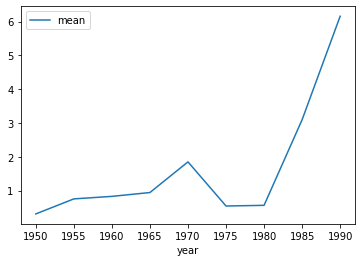

In [225]:
#Average Liquid Preciption Depth
liquid.plot(kind='line',x='year',y='mean')
plt.show()

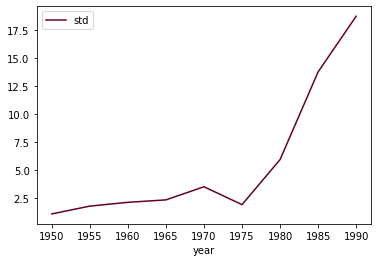

In [226]:
#std of Liquid Preciption Depth
liquid.plot(kind='line',x='year',y='std', colormap='RdBu')
plt.show()

In [227]:
sc.stop()